In [1]:
from typing import List, Optional, Union

import matplotlib as mpl
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

import utils as u
from models import pentzer2014pow, reina2016, rotationnality
from steps import preprocess
from utils import ssmr_utils as ssmru
from visualization import papermode

papermode(plt, size=12)


In [2]:
# abbrs = ("S01", "S02", "S03", "S04", "S05", "S28", "S29", "S30", "S31")
# abbrs = ("S06", "S07", "S08", "S09", "S10", "S28", "S29", "S30", "S31")
# abbrs = ("S01", "S02", "S03", "S04", "S05", "S06", "S07", "S08", "S09", "S10", "S21", "S22","S23", "S28", "S29", "S30", "S31")
# abbrs = (*abbrs, "D05", "D11", "D18", "D19", "D20", "D21", "D22")
abbrs = ("M01", "M02", "M03", "M04", "M05", "M06", "M07")
rot_abbrs = ("M03", "M04", "M05", "M06")
lin_abbrs = ("M01", "M02", "M07")
colors = {
    "asphalt": "xkcd:grey",
    "gravel": "xkcd:vibrant purple",
}
cols = {a: colors[u.get_terrain(a)] for a in abbrs}
terrains = ("Stationnement", "Dépôt à neige")

highlighted_abbrs = ("M03", "M04", "M05", "M06")
highlighted_abbrs = ("S23",)


def add_terrain_legend(mpl_elem: Union[mpl.axes.Axes, mpl.figure.Figure]):
    legend_handles = [mpatches.Patch(color=col, label=lab) for lab, col in zip(terrains,colors.values())]
    mpl_elem.legend(
        handles=legend_handles, ncol=len(colors), bbox_to_anchor=(0.5, -0.03), loc="upper center", title="Terrain"
    )

In [3]:
dfs = {}
for abbr in abbrs:
    preprocess(abbr, verbose=False)
    rot_df = rotationnality.rotationnality(abbr)
    reina_df = reina2016.reina2016(abbr, rot_df)
    pentz_df = pentzer2014pow.pentzer2014pow(abbr, reina_df)
    dfs[abbr] = pentz_df


M01: 100%|██████████| 101/101 [00:00<00:00, 1810.02it/s]


M01 : Exported PENTZER2014POW CSV in data/runs/M01/models/M01_2022-09-14-19-01-10-AP-LinParking01_pentzer2014pow.csv


M02: 100%|██████████| 188/188 [00:00<00:00, 2069.85it/s]


M02 : Exported PENTZER2014POW CSV in data/runs/M02/models/M02_2022-09-14-19-05-20-AP-LinParking02_pentzer2014pow.csv


M03: 100%|██████████| 186/186 [00:00<00:00, 2330.25it/s]


M03 : Exported PENTZER2014POW CSV in data/runs/M03/models/M03_2022-09-14-19-09-59-AP-RotParkingCCW01_pentzer2014pow.csv


M04: 100%|██████████| 195/195 [00:00<00:00, 2770.23it/s]


M04 : Exported PENTZER2014POW CSV in data/runs/M04/models/M04_2022-09-14-19-13-56-AP-RotParkingCW02_pentzer2014pow.csv


M05: 100%|██████████| 71/71 [00:00<00:00, 844.62it/s]


M05 : Exported PENTZER2014POW CSV in data/runs/M05/models/M05_2022-09-12-15-14-00-GD-RotDumpCCW01_pentzer2014pow.csv


M06: 100%|██████████| 137/137 [00:00<00:00, 3110.12it/s]


M06 : Exported PENTZER2014POW CSV in data/runs/M06/models/M06_2022-09-12-15-16-51-GD-RotDumpCCW02_pentzer2014pow.csv


M07: 100%|██████████| 195/195 [00:00<00:00, 2747.28it/s]

M07 : Exported PENTZER2014POW CSV in data/runs/M07/models/M07_2022-09-12-15-08-14-GD-LinDump_pentzer2014pow.csv


In [4]:
values = {"msym": {}, "masym": {},"Gsym": {}, "Gasym": {}}
for abbr in lin_abbrs:
    df = dfs[abbr]
    terr = u.get_terrain(abbr)
    msym = df.m_sym.dropna().tail(1).item()
    Gsym = df.G_sym.dropna().tail(1).item()
    masym = df.m_asym.dropna().tail(1).item()
    Gasym = df.G_asym.dropna().tail(1).item()
    values["msym"].setdefault(terr, []).append(msym)
    values["Gsym"].setdefault(terr, []).append(Gsym)
    values["masym"].setdefault(terr, []).append(masym)
    values["Gasym"].setdefault(terr, []).append(Gasym)
    print(f"{abbr} : {msym:.2f} & {Gsym:.2f} & {masym:.2f} & {Gasym:.2f} & {terr}")

# print(values)
ave = lambda x: sum(x) / len(x)

for terr in ("asphalt", "gravel"):
    print(terr)
    terr_values = {}
    for k, coeff in values.items():
        vals = coeff[terr]
        terr_values[k] = ave(vals)

    msym = terr_values["msym"]
    Gsym = terr_values["Gsym"]
    masym = terr_values["masym"]
    Gasym = terr_values["Gasym"]
    print(f"{terr:<5} & {msym:.2f} & {Gsym:.2f} & {masym:.2f} & {Gasym:.2f}")


M01 : -1.04 & 272.44 & 0.17 & 236.35 & asphalt
M02 : -0.73 & 216.12 & -0.01 & 209.22 & asphalt
M07 : 0.71 & 156.03 & 0.19 & 141.50 & gravel
asphalt
asphalt & -0.88 & 244.28 & 0.08 & 222.79
gravel
gravel & 0.71 & 156.03 & 0.19 & 141.50


In [5]:
figdir = u.get_figdir("summary", subdir="jrul")
figdir = u.get_figdir("summary", subdir="glo7021")
figdir = u.get_figdir("summary", subdir="jrul-new")
model_name = "Pentzer 2014"


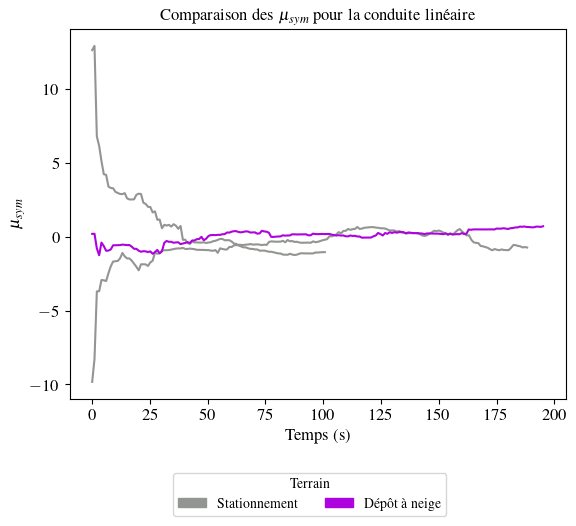

In [6]:
fig, ax = plt.subplots()

for abbr in lin_abbrs:
    col = cols[abbr]
    ax.plot(dfs[abbr].time_rel, dfs[abbr].m_sym, col, label=abbr)

add_terrain_legend(fig)
ax.set_xlabel("Temps (s)")
ax.set_ylabel("$\mu_{sym}$")
ax.set_title("Comparaison des $\mu_{sym}$ pour la conduite linéaire")

for ext in u.EXTS:
    fig.savefig(figdir / f"{model_name}_m_sym_lin.{ext}", bbox_inches="tight")


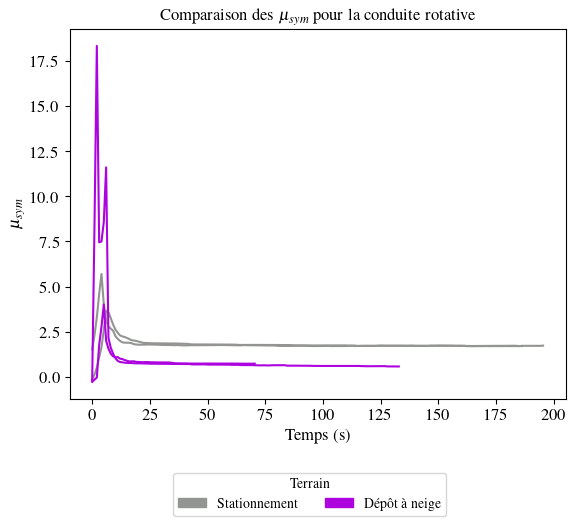

In [7]:
fig, ax = plt.subplots()

for abbr in rot_abbrs:
    col = cols[abbr]
    ax.plot(dfs[abbr].time_rel, dfs[abbr].m_sym, col, label=abbr)

add_terrain_legend(fig)
ax.set_xlabel("Temps (s)")
ax.set_ylabel("$\mu_{sym}$")
ax.set_title("Comparaison des $\mu_{sym}$ pour la conduite rotative")

for ext in u.EXTS:
    fig.savefig(figdir / f"{model_name}_m_sym_rot.{ext}", bbox_inches="tight")

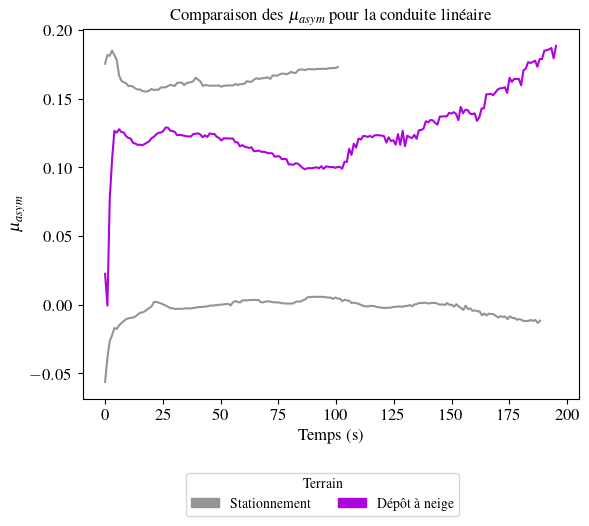

In [8]:
fig, ax = plt.subplots()

for abbr in lin_abbrs:
    col = cols[abbr]
    ax.plot(dfs[abbr].time_rel, dfs[abbr].m_asym, col, label=abbr)
# ax.set_ylim((0, 4))
add_terrain_legend(fig)
ax.set_xlabel("Temps (s)")
ax.set_ylabel("$\mu_{asym}$")
ax.set_title("Comparaison des $\mu_{asym}$ pour la conduite linéaire")

for ext in u.EXTS:
    fig.savefig(figdir / f"{model_name}_m_asym_lin.{ext}", bbox_inches="tight")

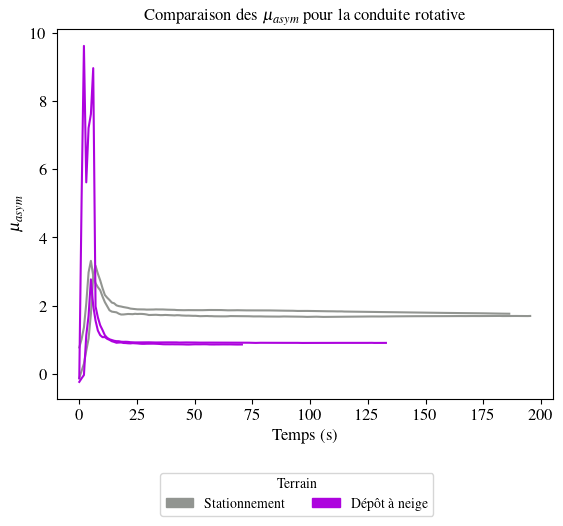

In [9]:
fig, ax = plt.subplots()

for abbr in rot_abbrs:
    col = cols[abbr]
    ax.plot(dfs[abbr].time_rel, dfs[abbr].m_asym, col, label=abbr)
# ax.set_ylim((0, 4))
add_terrain_legend(fig)
ax.set_xlabel("Temps (s)")
ax.set_ylabel("$\mu_{asym}$")
ax.set_title("Comparaison des $\mu_{asym}$ pour la conduite rotative")

for ext in u.EXTS:
    fig.savefig(figdir / f"{model_name}_m_asym_rot.{ext}", bbox_inches="tight")

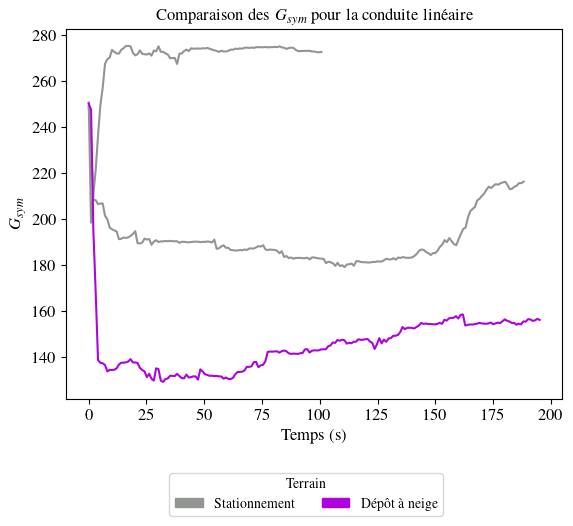

In [10]:
fig, ax = plt.subplots()

for abbr in lin_abbrs:
    col = cols[abbr]
    ax.plot(dfs[abbr].time_rel, dfs[abbr].G_sym, col, label=abbr)
# ax.set_ylim((0, 4))
add_terrain_legend(fig)
ax.set_xlabel("Temps (s)")
ax.set_ylabel("$G_{sym}$")
ax.set_title("Comparaison des $G_{sym}$ pour la conduite linéaire")

for ext in u.EXTS:
    fig.savefig(figdir / f"{model_name}_G_sym_lin.{ext}", bbox_inches="tight")

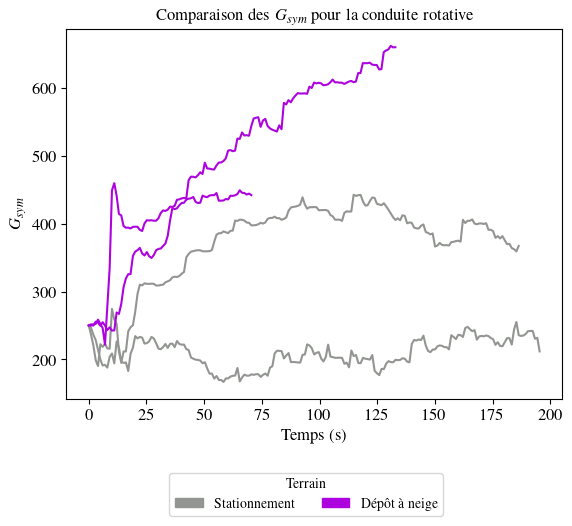

In [11]:
fig, ax = plt.subplots()

for abbr in rot_abbrs:
    col = cols[abbr]
    ax.plot(dfs[abbr].time_rel, dfs[abbr].G_sym, col, label=abbr)
# ax.set_ylim((0, 4))
add_terrain_legend(fig)
ax.set_xlabel("Temps (s)")
ax.set_ylabel("$G_{sym}$")
ax.set_title("Comparaison des $G_{sym}$ pour la conduite rotative")

for ext in u.EXTS:
    fig.savefig(figdir / f"{model_name}_G_sym_rot.{ext}", bbox_inches="tight")

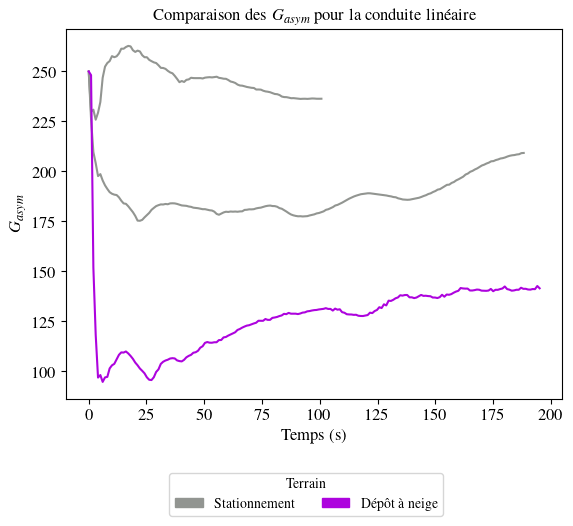

In [12]:
fig, ax = plt.subplots()

for abbr in lin_abbrs:
    col = cols[abbr]
    ax.plot(dfs[abbr].time_rel, dfs[abbr].G_asym, col, label=abbr)
# ax.set_ylim((0, 4))
add_terrain_legend(fig)
ax.set_xlabel("Temps (s)")
ax.set_ylabel("$G_{asym}$")
ax.set_title("Comparaison des $G_{asym}$ pour la conduite linéaire")

for ext in u.EXTS:
    fig.savefig(figdir / f"{model_name}_G_asym_lin.{ext}", bbox_inches="tight")

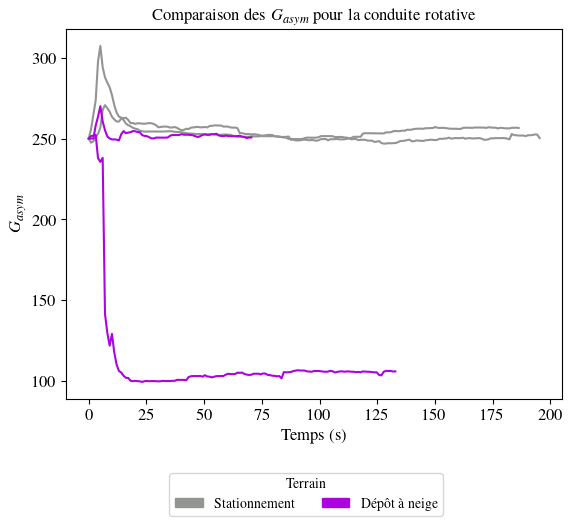

In [13]:
fig, ax = plt.subplots()

for abbr in rot_abbrs:
    col = cols[abbr]
    ax.plot(dfs[abbr].time_rel, dfs[abbr].G_asym, col, label=abbr)
# ax.set_ylim((0, 4))
add_terrain_legend(fig)
ax.set_xlabel("Temps (s)")
ax.set_ylabel("$G_{asym}$")
ax.set_title("Comparaison des $G_{asym}$ pour la conduite rotative")

for ext in u.EXTS:
    fig.savefig(figdir / f"{model_name}_G_asym_rot.{ext}", bbox_inches="tight")

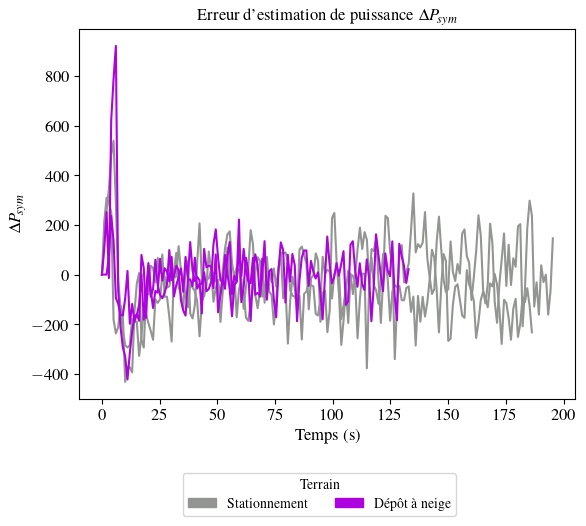

In [14]:
fig, ax = plt.subplots()

for abbr in rot_abbrs:
    col = cols[abbr]
    ax.plot(dfs[abbr].time_rel, dfs[abbr].Perrt_sym, col, label=abbr)
# ax.set_ylim((0, 4))
add_terrain_legend(fig)
ax.set_xlabel("Temps (s)")
ax.set_ylabel("$\Delta P_{sym}$")
ax.set_title("Erreur d'estimation de puissance $\Delta P_{sym}$")

for ext in u.EXTS:
    fig.savefig(figdir / f"{model_name}_errsym.{ext}", bbox_inches="tight")

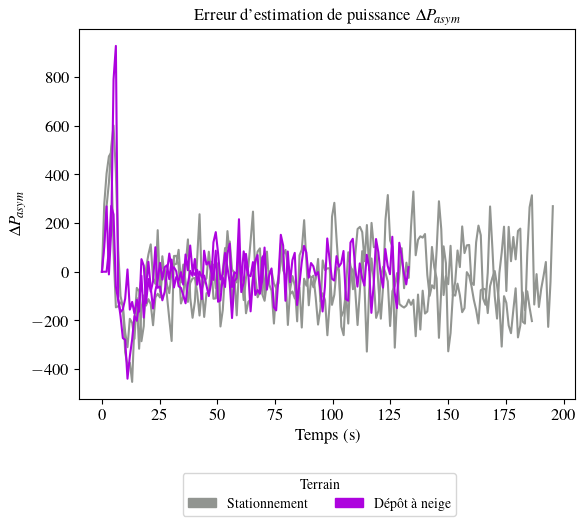

In [15]:
fig, ax = plt.subplots()

for abbr in rot_abbrs:
    col = cols[abbr]
    ax.plot(dfs[abbr].time_rel, dfs[abbr].Perrt_asym, col, label=abbr)
# ax.set_ylim((0, 4))
add_terrain_legend(fig)
ax.set_xlabel("Temps (s)")
ax.set_ylabel("$\Delta P_{asym}$")
ax.set_title("Erreur d'estimation de puissance $\Delta P_{asym}$")

for ext in u.EXTS:
    fig.savefig(figdir / f"{model_name}_errasym.{ext}", bbox_inches="tight")

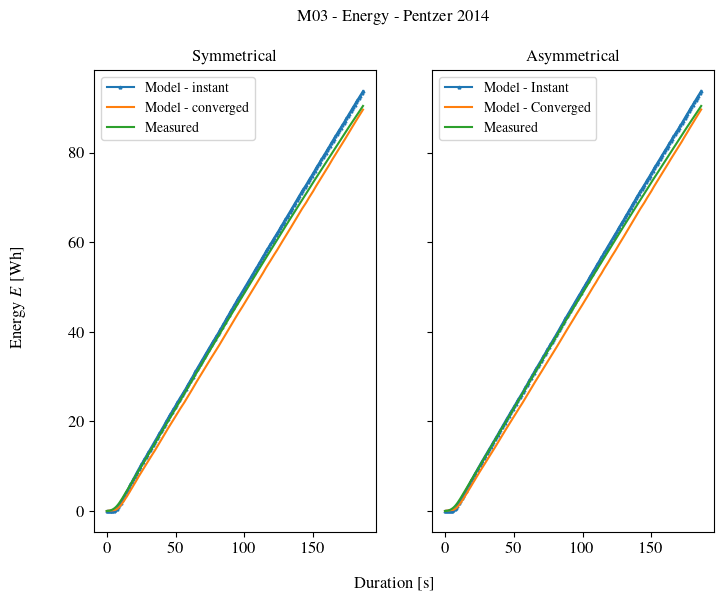

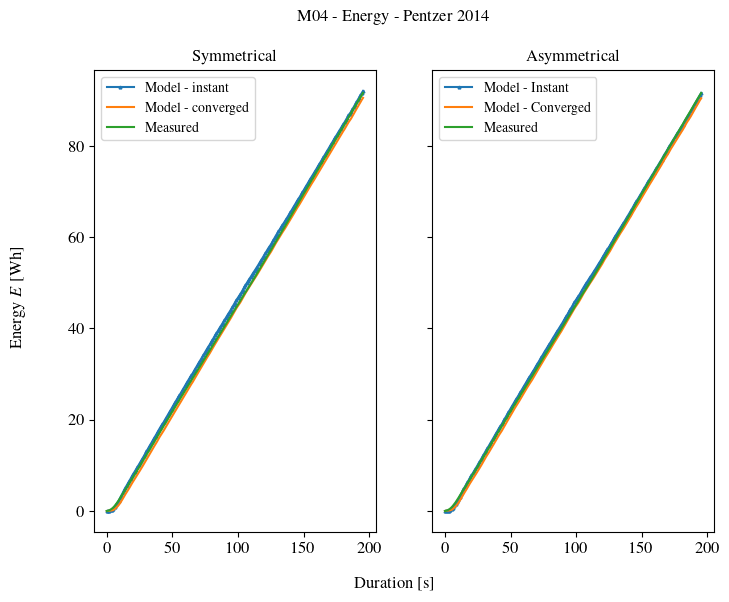

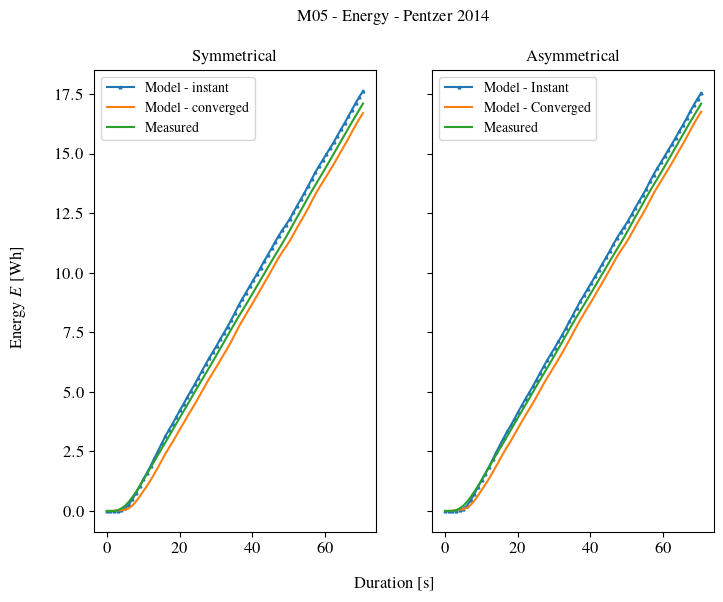

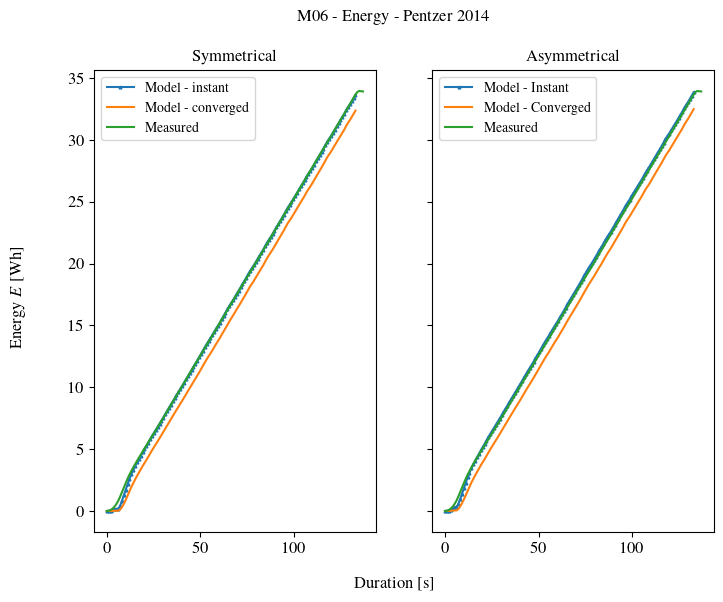

In [16]:
for abbr in rot_abbrs:
    df = dfs[abbr]
    fig, [ax1, ax2] = plt.subplots(ncols=2, sharey=True, sharex=True, figsize=(8, 6))

    ax1.plot(df.time_rel, df.Epredt_sym_Wh, label="Model - instant", marker="^", markersize=2)
    ax1.plot(df.time_rel, df.Epredc_sym_Wh, label="Model - converged")
    ax1.plot(df.time_rel, df.energy_Wh, label="Measured")
    ax1.legend()
    ax1.set_title("Symmetrical")

    ax2.plot(df.time_rel, df.Epredt_asym_Wh, label="Model - Instant", marker="^", markersize=2)
    ax2.plot(df.time_rel, df.Epredc_asym_Wh, label="Model - Converged")
    ax2.plot(df.time_rel, df.energy_Wh, label="Measured")
    ax2.legend()
    ax2.set_title("Asymmetrical")

    fig.supylabel("Energy $E$ [Wh]")
    fig.supxlabel("Duration [s]")
    fig.suptitle(f"{abbr} - Energy - {model_name}")
    fig.savefig(figdir / f"{abbr}_EnergyWh.jpg", bbox_inches="tight")

In [17]:
errors_data = []
for abbr in abbrs:
    model_data = ssmru.model_values_from_json(abbr, pentzer2014pow.__MODEL_NAME__)
    errors = model_data["errors"]
    abbr_data = {
        "name": abbr,
        "motion": "rot" if abbr in rot_abbrs else "lin",
        "terrain": u.get_terrain(abbr),
        "err_casym": errors["casym"],
        "err_csym": errors["csym"],
        "err_tasym": errors["tasym"],
        "err_tsym": errors["tsym"],
    }
    errors_data.append(abbr_data)

In [18]:
summary = pd.DataFrame(data=errors_data)
for col in ("err_casym", "err_csym", "err_tasym", "err_tsym"):
    summary[col] = 100 * summary[col]

In [19]:
summary.head()

name motion  terrain  err_casym  err_csym  err_tasym   err_tsym
0  M01    lin  asphalt  -0.078205 -0.195901   3.113119   3.448940
1  M02    lin  asphalt  -0.528977 -0.535777  -9.777355 -10.263339
2  M03    rot  asphalt  -0.866081 -0.905972   3.689225   3.645609
3  M04    rot  asphalt  -1.266531 -1.177912  -0.043500   0.463482
4  M05    rot   gravel  -2.036271 -2.346458   2.612220   3.075864

In [20]:
# Colors
BG_WHITE = "#fbf9f4"
GREY_LIGHT = "#b4aea9"
GREY50 = "#7F7F7F"
BLUE_DARK = "#1B2838"
BLUE = "#2a475e"
BLACK = "#282724"
GREY_DARK = "#747473"
RED_DARK = "#850e00"

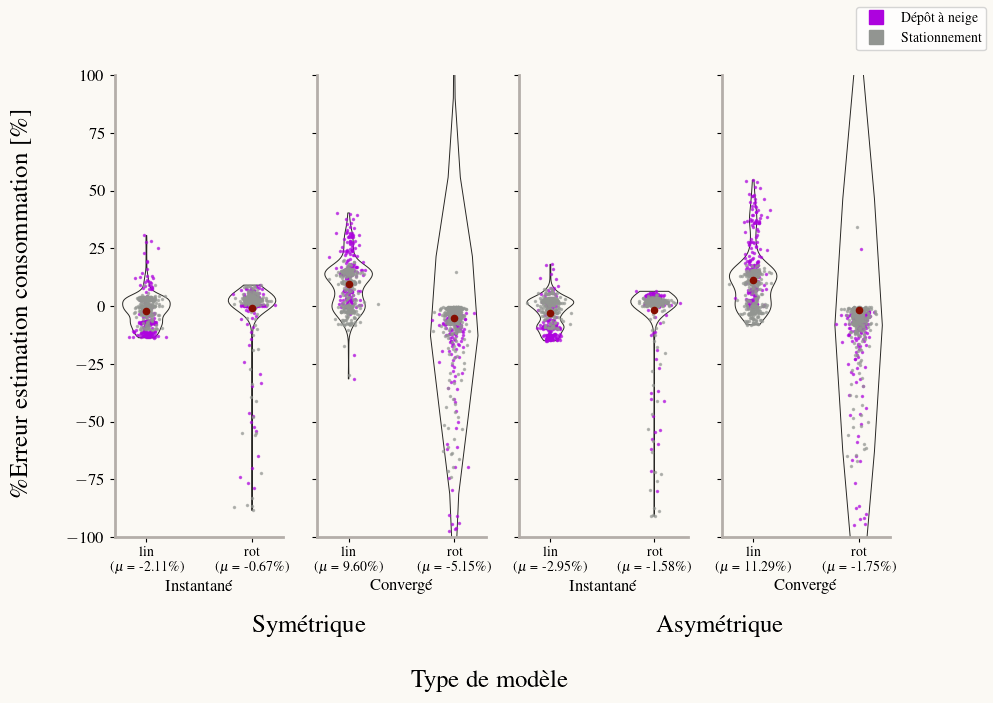

In [21]:
motions = sorted(summary.motion.unique())
soils = ("asphalt", "gravel")
fig, subfigs = plt.subplots(ncols=4, sharey=True, figsize=(10, 6))

# Background color
fig.patch.set_facecolor(BG_WHITE)

columns = ("err_tsym", "err_csym", "err_tasym", "err_casym")
terrain_description = {
    "asphalt": "Stationnement",
    "gravel": "Dépôt à neige",
}
labels = terrain_description
for errcol, ax in zip(columns, subfigs.reshape(-1)):
    dfcol = f"pc{errcol}"
    ax.set_facecolor(BG_WHITE)

    POSITIONS = [0, 1]

    v_names = [summary[summary.motion == mot].name.values for mot in motions]
    v_data = [tuple(dfs[dfab][dfcol] for dfab in motnames) for motnames in v_names]
    v_data = [100 * pd.concat(vdat).dropna() for vdat in v_data]

    violins = ax.violinplot(
        v_data,
        positions=POSITIONS,
        widths=0.45,
        bw_method="silverman",
        showmeans=False,
        showmedians=False,
        showextrema=False,
    )

    for pc in violins["bodies"]:
        pc.set_facecolor("none")
        pc.set_edgecolor(BLACK)
        pc.set_linewidth(0.7)
        pc.set_alpha(1)

    medianprops = dict(
        linewidth=2,
        color=GREY_DARK,
        solid_capstyle="butt",
    )
    boxprops = dict(
        linewidth=1,
        color=GREY_DARK,
    )

    # Add dot representing the mean
    means = [v.mean() for v in v_data]
    ax.scatter(POSITIONS, means, s=20, color=RED_DARK, zorder=3)

    # ax.boxplot(
    #     v_data,
    #     positions=POSITIONS,
    #     showfliers=False,  # Do not show the outliers beyond the caps.
    #     showcaps=False,  # Do not show the caps
    #     medianprops=medianprops,
    #     whiskerprops=boxprops,
    #     boxprops=boxprops,
    # )

    jitter = 0.04
    # Scatter
    for pos, mot in enumerate(motions):
        for terr in reversed(soils):
            motvals = summary[(summary.motion == mot) & (summary.terrain == terr)]
            names = motvals.name

            motdfs = [dfs[abbr][dfcol].dropna() for abbr in names]
            motdf = 100 * pd.concat(motdfs)

            xdata = pos * np.ones(len(motdf.index))
            x_jittered = xdata + st.t(df=6, scale=jitter).rvs(len(xdata))
            # mask = motvals.terrain == terr
            # xdata = xjitt[mask]
            # ydata = motvals[dfcol].loc[mask]

            ax.plot(
                x_jittered,
                motdf,
                color=colors[terr],
                marker="o",
                label=labels[terr],
                alpha=0.6,
                markersize=1.5,
                linestyle="",
            )
            labels[terr] = "_nolegend_"

    ax.set_xticks(POSITIONS)
    xticklabels = [f"{mot}\n($\mu$ = {m:.2f}\%)" for mot, m in zip(motions, means)]
    ax.set_xticklabels(xticklabels, size=10, ha="center", ma="center")
    ax.set_ylim((-100, 100))

    ax.spines["right"].set_color("none")
    ax.spines["top"].set_color("none")

    # Customize spines color
    ax.spines["left"].set_color(GREY_LIGHT)
    ax.spines["left"].set_linewidth(2)
    ax.spines["bottom"].set_color(GREY_LIGHT)
    ax.spines["bottom"].set_linewidth(2)

    xlabel = "Convergé" if dfcol.startswith("pcerr_c") else "Instantané"
    ax.set_xlabel(xlabel)


lgnd = fig.legend()
lgnd.legendHandles[0].set_markersize(10)
lgnd.legendHandles[1].set_markersize(10)
lgnd.legendHandles[0].set_alpha(1)
lgnd.legendHandles[1].set_alpha(1)
lgnd.legendHandles[0].set_marker("s")
lgnd.legendHandles[1].set_marker("s")
fig.supylabel("\%Erreur estimation consommation [\%]", size=18, weight="bold")
fig.supxlabel("Type de modèle", size=18, weight="bold", y=-0.15)
fig.text(y=-0.05, x=0.32, transform=fig.transSubfigure, ha="center", s="Symétrique", size=18)
fig.text(y=-0.05, x=0.73, transform=fig.transSubfigure, ha="center", s="Asymétrique", size=18)
for ext in u.EXTS:
    fig.savefig(figdir / f"pcerr_{model_name}.{ext}", bbox_inches="tight")


In [22]:
ld = lgnd.legendHandles[1].__dir__()
[a for a in ld if "mark" in a]

['_marker',
 '_markevery',
 '_markersize',
 '_markeredgecolor',
 '_markeredgewidth',
 '_markerfacecolor',
 '_markerfacecoloralt',
 'markers',
 'filled_markers',
 'set_markevery',
 'get_markevery',
 'get_marker',
 'get_markeredgecolor',
 'get_markeredgewidth',
 '_get_markerfacecolor',
 'get_markerfacecolor',
 'get_markerfacecoloralt',
 'get_markersize',
 'set_marker',
 '_set_markercolor',
 'set_markeredgecolor',
 'set_markerfacecolor',
 'set_markerfacecoloralt',
 'set_markeredgewidth',
 'set_markersize']

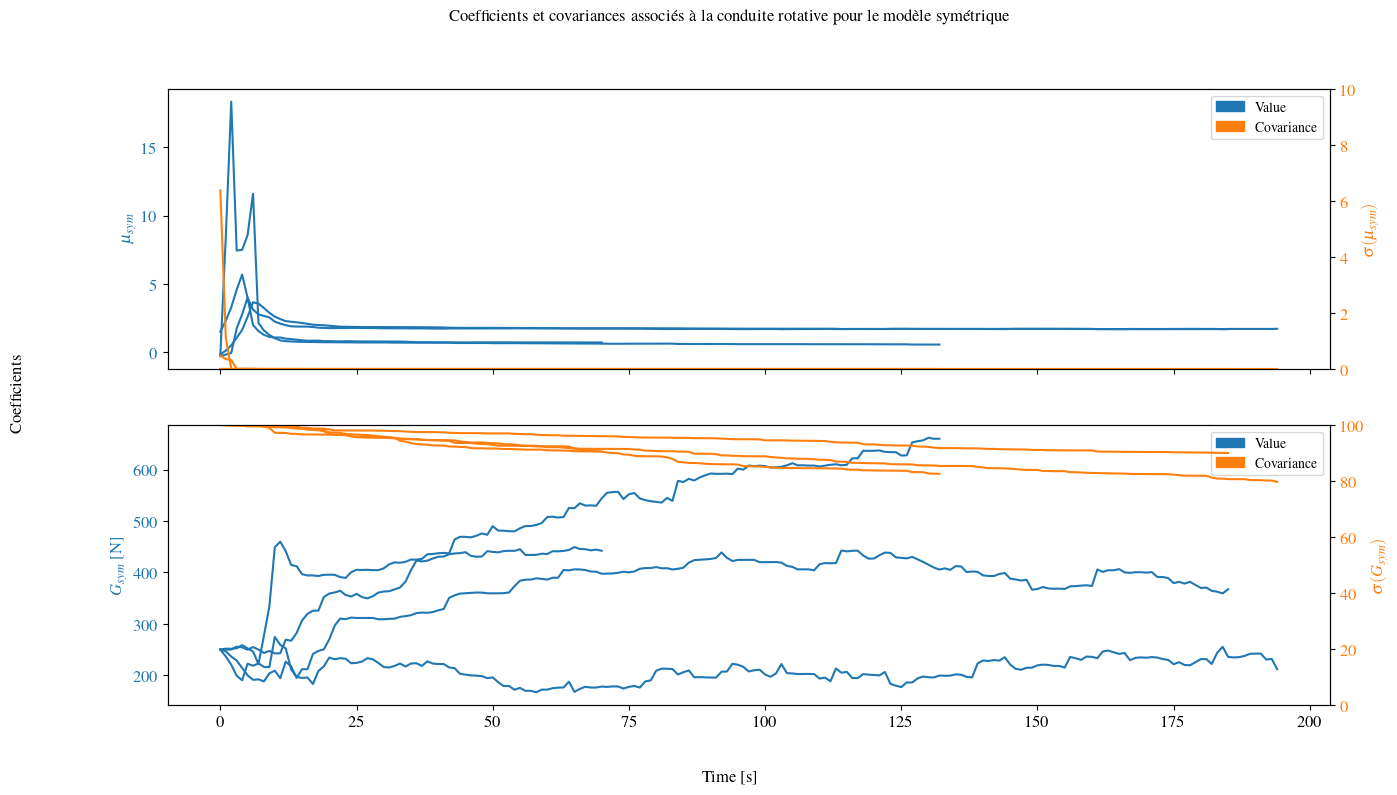

In [23]:
fig_colors = {"C0": "Value", "C1": "Covariance"}
legend_handles = [mpatches.Patch(color=col, label=lab) for col, lab in fig_colors.items()]

fig, [ax1, ax2] = plt.subplots(nrows=2, sharex=True, figsize=(15, 8))

for abbr in rot_abbrs:
    dfs[abbr].m_sym.plot(ax=ax1, label="Value", color="C0")
    dfs[abbr].G_sym.plot(ax=ax2, label="Value", color="C0")

# ax1.axhline(y=optimal["mu"], color="g", linestyle="--", label="Optimal")
# ax2.axhline(y=optimal["G"], color="g", linestyle="--", label="Optimal")

ax1_twin = ax1.twinx()
ax2_twin = ax2.twinx()

for abbr in rot_abbrs:
    dfs[abbr].sm_sym.plot(ax=ax1_twin, label="Covariance", color="C1")
    dfs[abbr].sG_sym.plot(ax=ax2_twin, label="Covariance", color="C1")

ax1.set_ylabel("${\mu}_{sym}$", color="C0")
ax2.set_ylabel("$G_{sym}$ [N]", color="C0")

ax1_twin.set_ylabel("${\sigma}({\mu}_{sym})$", color="C1")
ax2_twin.set_ylabel("${\sigma}({G}_{sym})$", color="C1")

ax1.tick_params(axis='y', labelcolor="C0")
ax2.tick_params(axis='y', labelcolor="C0")

ax1_twin.set_ylim((0, 10))
ax2_twin.set_ylim((0, 100))

ax1_twin.tick_params(axis='y', labelcolor="C1")
ax2_twin.tick_params(axis='y', labelcolor="C1")

ax1.legend(handles=legend_handles)
ax2.legend(handles=legend_handles)

# ax1.set_title(f"Optimal value : {optimal['mu']}")
# ax2.set_title(f"Optimal value : {optimal['G']}")

fig.supylabel("Coefficients")
fig.supxlabel("Time [s]")

# optimal_err = optimal["err"]
fig.suptitle(f"Coefficients et covariances associés à la conduite rotative pour le modèle symétrique")

for ext in u.EXTS:
    fig.savefig(figdir / f"{model_name}_rot-covcoeff.{ext}", bbox_inches="tight")

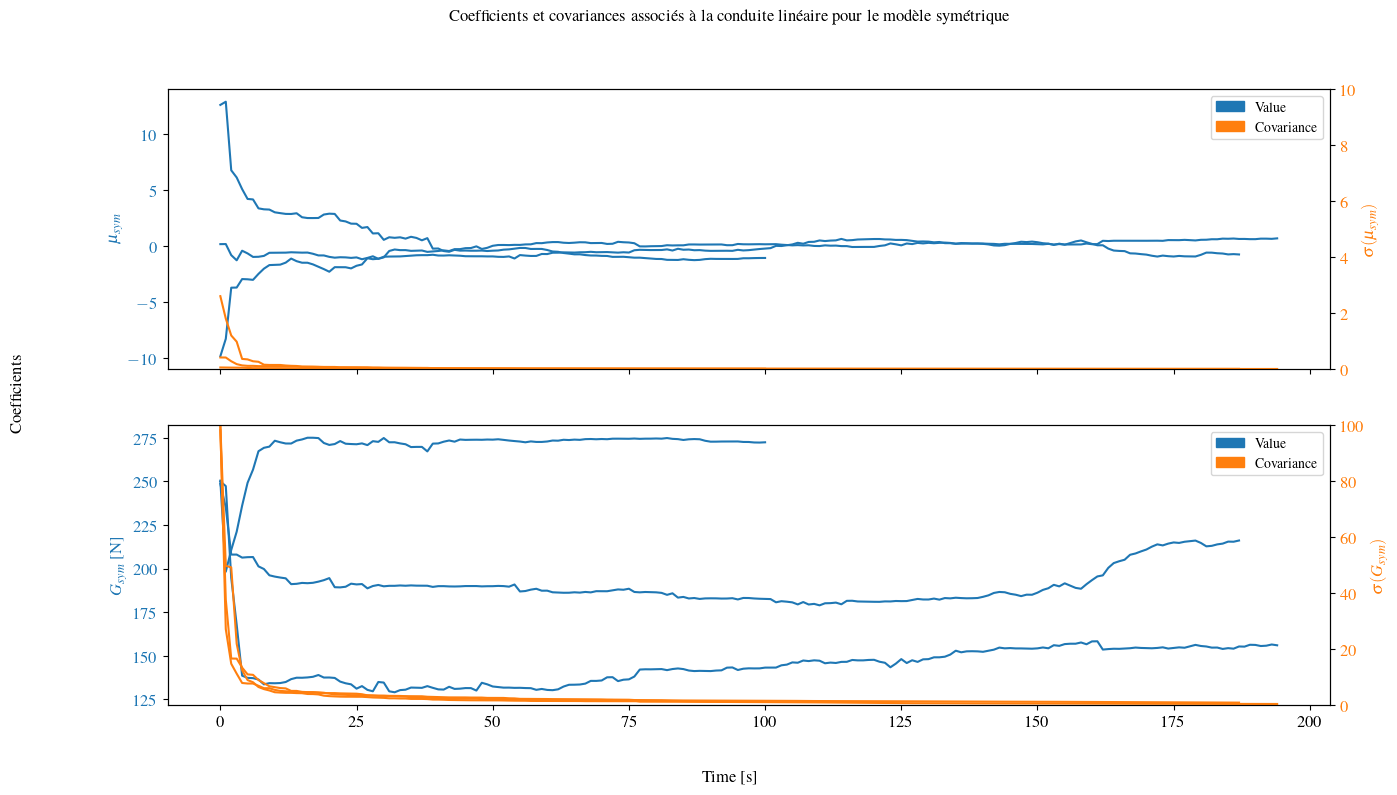

In [24]:
fig_colors = {"C0": "Value", "C1": "Covariance"}
legend_handles = [mpatches.Patch(color=col, label=lab) for col, lab in fig_colors.items()]

fig, [ax1, ax2] = plt.subplots(nrows=2, sharex=True, figsize=(15, 8))

for abbr in lin_abbrs:
    dfs[abbr].m_sym.plot(ax=ax1, label="Value", color="C0")
    dfs[abbr].G_sym.plot(ax=ax2, label="Value", color="C0")

# ax1.axhline(y=optimal["mu"], color="g", linestyle="--", label="Optimal")
# ax2.axhline(y=optimal["G"], color="g", linestyle="--", label="Optimal")

ax1_twin = ax1.twinx()
ax2_twin = ax2.twinx()

for abbr in lin_abbrs:
    dfs[abbr].sm_sym.plot(ax=ax1_twin, label="Covariance", color="C1")
    dfs[abbr].sG_sym.plot(ax=ax2_twin, label="Covariance", color="C1")

ax1.set_ylabel("${\mu}_{sym}$", color="C0")
ax2.set_ylabel("$G_{sym}$ [N]", color="C0")

ax1_twin.set_ylabel("${\sigma}({\mu}_{sym})$", color="C1")
ax2_twin.set_ylabel("${\sigma}({G}_{sym})$", color="C1")

ax1.tick_params(axis='y', labelcolor="C0")
ax2.tick_params(axis='y', labelcolor="C0")

ax1_twin.set_ylim((0, 10))
ax2_twin.set_ylim((0, 100))

ax1_twin.tick_params(axis='y', labelcolor="C1")
ax2_twin.tick_params(axis='y', labelcolor="C1")

ax1.legend(handles=legend_handles)
ax2.legend(handles=legend_handles)

# ax1.set_title(f"Optimal value : {optimal['mu']}")
# ax2.set_title(f"Optimal value : {optimal['G']}")

fig.supylabel("Coefficients")
fig.supxlabel("Time [s]")

# optimal_err = optimal["err"]
fig.suptitle(f"Coefficients et covariances associés à la conduite linéaire pour le modèle symétrique")

for ext in u.EXTS:
    fig.savefig(figdir / f"{model_name}_lin-covcoeff.{ext}", bbox_inches="tight")